# Generalization with OOP: An SMA Backtesting Class in Action
Part 127

Question:
- What is outperformance (cumulative_returns)

## Create Backtester Class

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
class SMABacktester():
    def __init__(self, symbol:str, sma_s:int, sma_l:int, start:str, end:str):
        self.symbol = symbol
        self.sma_s = sma_s
        self.sma_l = sma_l
        self.start = start
        self.end = end
        self.get_data()
        
    def get_data(self):
        # Getting the dataframe, drop and rename
        raw = pd.read_csv("data/forex_pairs.csv", parse_dates=["Date"], index_col="Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end,:].copy()
        raw.rename(columns={self.symbol:"price"}, inplace=True)
        
        raw["returns"] = np.log(raw/raw.shift(1))
        raw["sma_s"] = raw["price"].rolling(self.sma_s).mean()
        raw["sma_l"] = raw["price"].rolling(self.sma_l).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, sma_s_input=None, sma_l_input=None):
        if sma_s_input is not None:
            self.sma_s = sma_s_input
            self.data["sma_s"] = self.data["price"].rolling(self.sma_s).mean()
        if sma_l_input is not None:
            self.sma_l = sma_l_input
            self.data["sma_l"] = self.data["price"].rolling(self.sma_l).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["sma_s"] > data["sma_l"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["cumu_returns"] = data["returns"].cumsum().apply(np.exp)
        data["cumu_strategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        # Finding the absolute performance - the bottom of the cumulative strategy
        perf = data["cumu_strategy"].iloc[-1]
        # Finding out performance
        out_perf = perf - data["cumu_returns"].iloc[-1]
        return round(perf, 4), round(out_perf, 4)
    
    def plot_results(self):
        if self.results is None:
            print("Run test_strategy() before plotting the result")
        else:
            title = f"{self.symbol} - SMA_S:{self.sma_s}|SMA_L:{self.sma_l}"
            self.results[["cumu_returns", "cumu_strategy"]].plot(figsize=(10,7), title=title)
            

In [70]:
tester = SMABacktester("AUDEUR=X", 50, 200, "2010-01-01", "2019-12-31")

tester.data

,price,returns,sma_s,sma_l
Date,,,,
2010-01-01,0.62402,NaN,NaN,NaN
2010-01-04,0.63230,0.013182,NaN,NaN
2010-01-05,0.63430,0.003158,NaN,NaN
2010-01-06,0.63860,0.006756,NaN,NaN
2010-01-07,0.64060,0.003127,NaN,NaN
...,...,...,...,...
2019-12-25,0.62410,-0.000240,0.617223,0.619946
2019-12-26,0.62380,-0.000481,0.617499,0.619907
2019-12-27,0.62550,0.002722,0.617745,0.619901


In [71]:
tester.set_parameters(30,120)
tester.data

,price,returns,sma_s,sma_l
Date,,,,
2010-01-01,0.62402,NaN,NaN,NaN
2010-01-04,0.63230,0.013182,NaN,NaN
2010-01-05,0.63430,0.003158,NaN,NaN
2010-01-06,0.63860,0.006756,NaN,NaN
2010-01-07,0.64060,0.003127,NaN,NaN
...,...,...,...,...
2019-12-25,0.62410,-0.000240,0.616969,0.615853
2019-12-26,0.62380,-0.000481,0.617058,0.615938
2019-12-27,0.62550,0.002722,0.617378,0.616047


In [72]:
tester.test_strategy()

(0.6727, -0.2196)

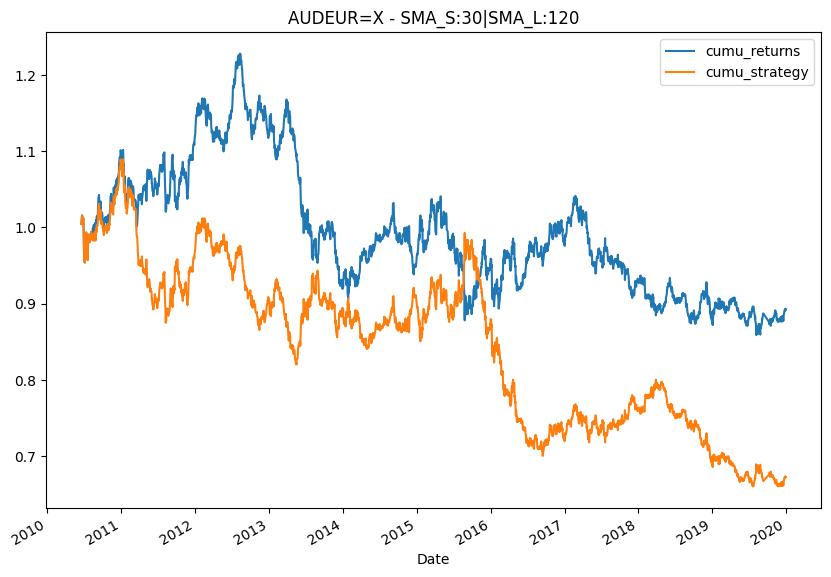

In [73]:
tester.plot_results()

In [48]:
dft = pd.read_csv("data/forex_pairs.csv", parse_dates=["Date"], index_col="Date")
dft

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480
